In [103]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
import datetime as dt
%matplotlib notebook

# Testing
### 1. Testing capacity

In [69]:
df = pd.read_csv('overview_2021-10-07_testing_capacity.csv', delimiter=',')
df.shape

(566, 9)

In [70]:
df.columns

Index(['areaCode', 'areaName', 'areaType', 'date', 'capacityPillarFour',
       'capacityPillarOne', 'capacityPillarOneTwo', 'capacityPillarThree',
       'capacityPillarTwo'],
      dtype='object')

In [71]:
df.dtypes

areaCode                 object
areaName                 object
areaType                 object
date                     object
capacityPillarFour      float64
capacityPillarOne         int64
capacityPillarOneTwo      int64
capacityPillarThree     float64
capacityPillarTwo       float64
dtype: object

In [72]:
df.head(5)

,areaCode,areaName,areaType,date,capacityPillarFour,capacityPillarOne,capacityPillarOneTwo,capacityPillarThree,capacityPillarTwo
0,K02000001,United Kingdom,overview,2021-10-06,2400.0,198805,863315,120000.0,664510.0
1,K02000001,United Kingdom,overview,2021-10-05,2400.0,198805,863315,120000.0,664510.0
2,K02000001,United Kingdom,overview,2021-10-04,2400.0,198805,863315,120000.0,664510.0
3,K02000001,United Kingdom,overview,2021-10-03,2400.0,198805,845135,120000.0,646330.0
4,K02000001,United Kingdom,overview,2021-10-02,2400.0,198805,830605,120000.0,631800.0


In [73]:
df.tail(5)

,areaCode,areaName,areaType,date,capacityPillarFour,capacityPillarOne,capacityPillarOneTwo,capacityPillarThree,capacityPillarTwo
561,K02000001,United Kingdom,overview,2020-03-24,NaN,10949,10949,NaN,NaN
562,K02000001,United Kingdom,overview,2020-03-23,NaN,10949,10949,NaN,NaN
563,K02000001,United Kingdom,overview,2020-03-22,NaN,10949,10949,NaN,NaN
564,K02000001,United Kingdom,overview,2020-03-21,NaN,6127,6127,NaN,NaN
565,K02000001,United Kingdom,overview,2020-03-20,NaN,6127,6127,NaN,NaN


In [75]:
#  sorting out date 
#  convert the date (object) to the datetime type
df['date'] = pd.to_datetime(df['date'], dayfirst = True)
df.sort_values(by = 'date', ascending = True, inplace = True)
df.dtypes
# df.reset_index()
# df.drop("index", axis = 1, inplace = True)


areaCode                        object
areaName                        object
areaType                        object
date                    datetime64[ns]
capacityPillarFour             float64
capacityPillarOne                int64
capacityPillarOneTwo             int64
capacityPillarThree            float64
capacityPillarTwo              float64
dtype: object

In [86]:
# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)

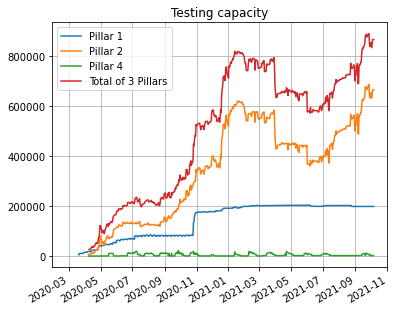

In [87]:
# plotting testing capacity
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df['date'],df['capacityPillarOne'], linestyle = 'solid', label = "Pillar 1")
plt.plot(df['date'],df['capacityPillarTwo'], linestyle = 'solid', label = "Pillar 2")
plt.plot(df['date'],df['capacityPillarFour'], linestyle = 'solid', label = "Pillar 4")
plt.plot(df['date'],df['capacityPillarOneTwo']+df['capacityPillarFour'], linestyle = 'solid', label = "Total of 3 Pillars")
plt.gcf().autofmt_xdate()
plt.grid()

plt.title("Testing capacity")
plt.gca().set_xbound(date_start, date_end)
# ax.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}%'.format))
plt.legend()
plt.show()


### Notes: 
* Pillar 1: NHS and UKHSA Testing
    * Virus testing in UK Health Security Agency (UKHSA) labs and NHS hospitals for those with a clinical need, and health and care workers

* Pillar 2: UK Government testing programme
    * Virus testing for the wider population; using Lighthouse laboratories and partnership with public, private and academic sector laboratories
    * lab based testing and rapid lateral flow testing
* Pillar 3: Antibody testing (not included in the plot)
* Pillar 4: Surveillance testing
    * Virus testing and antibody serology testing for national surveillance (learn more about the prevalence and spread of the virus and for other testing research purposes)
    * capacity is procured for this Pillar based on the number of participants
  
Testing capacity data are available for the UK only so data cannot be presented separately for the four nations.


### 2. Testing conducted

In [88]:
df_testing_conducted = pd.read_csv('data_2021-Oct-07_testing_conducted.csv',delimiter = ',')
df_testing_conducted.shape

(555, 14)

In [89]:
df_testing_conducted.head(5)

,areaType,areaName,areaCode,date,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newTestsByPublishDate,cumPillarOneTestsByPublishDate,cumPillarTwoTestsByPublishDate,cumPillarThreeTestsByPublishDate,cumPillarFourTestsByPublishDate,cumTestsByPublishDate
0,overview,United Kingdom,K02000001,2021-10-06,104173,949278,1210.0,21183.0,1075844,39634333,257847380,2346791.0,10611685.0,310440189
1,overview,United Kingdom,K02000001,2021-10-05,105074,751342,1102.0,1095.0,858613,39530161,256843783,2345258.0,10584298.0,309303500
2,overview,United Kingdom,K02000001,2021-10-04,80038,860943,677.0,1520.0,943178,39425150,256035681,2344156.0,10571999.0,308376986
3,overview,United Kingdom,K02000001,2021-10-03,70791,936712,328.0,14567.0,1022398,39345112,255079964,2343479.0,10570479.0,307339034
4,overview,United Kingdom,K02000001,2021-10-02,81209,639662,530.0,14167.0,735568,39274321,254110751,2343151.0,10555779.0,306284002


In [90]:
df_testing_conducted.tail(5)

,areaType,areaName,areaCode,date,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newTestsByPublishDate,cumPillarOneTestsByPublishDate,cumPillarTwoTestsByPublishDate,cumPillarThreeTestsByPublishDate,cumPillarFourTestsByPublishDate,cumTestsByPublishDate
550,overview,United Kingdom,K02000001,2020-04-04,15103,796,NaN,181.0,16080,234506,4330,NaN,822.0,239658
551,overview,United Kingdom,K02000001,2020-04-03,13616,677,NaN,336.0,14629,219403,3534,NaN,641.0,223578
552,overview,United Kingdom,K02000001,2020-04-02,12854,603,NaN,166.0,13623,179190,2857,NaN,305.0,182352
553,overview,United Kingdom,K02000001,2020-04-01,11256,668,NaN,23.0,11947,164844,2254,NaN,139.0,167237
554,overview,United Kingdom,K02000001,2020-03-31,11267,629,NaN,NaN,11896,153588,1586,NaN,NaN,155174


In [91]:
df_testing_conducted.columns

Index(['areaType', 'areaName', 'areaCode', 'date',
       'newPillarOneTestsByPublishDate', 'newPillarTwoTestsByPublishDate',
       'newPillarThreeTestsByPublishDate', 'newPillarFourTestsByPublishDate',
       'newTestsByPublishDate', 'cumPillarOneTestsByPublishDate',
       'cumPillarTwoTestsByPublishDate', 'cumPillarThreeTestsByPublishDate',
       'cumPillarFourTestsByPublishDate', 'cumTestsByPublishDate'],
      dtype='object')

In [92]:
df_testing_conducted['date'] = pd.to_datetime(df_tesing_conducted['date'], dayfirst = True)
df_testing_conducted.sort_values(by = 'date', ascending = True, inplace= True)

<IPython.core.display.Javascript object>


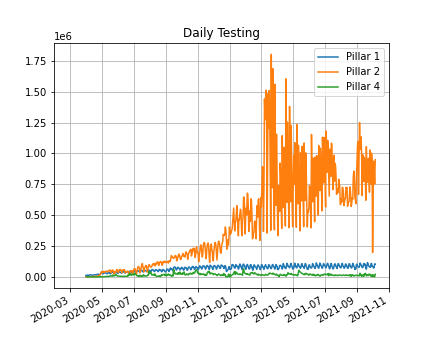

In [121]:
# plotting conducted testing on each day
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarOneTestsByPublishDate'], linestyle = 'solid', label = "Pillar 1")
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarTwoTestsByPublishDate'], linestyle = 'solid', label = "Pillar 2")
plt.plot(df_testing_conducted['date'],df_testing_conducted['newPillarFourTestsByPublishDate'], linestyle = 'solid', label = "Pillar 4")
plt.gcf().autofmt_xdate()
plt.grid()

plt.title("Daily Testing")

# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)

plt.gca().set_xbound(date_start, date_end)
plt.legend()
plt.show()
# plt.savefig('test.png')

In [95]:
df_testing_conducted.tail(20)


,areaType,areaName,areaCode,date,newPillarOneTestsByPublishDate,newPillarTwoTestsByPublishDate,newPillarThreeTestsByPublishDate,newPillarFourTestsByPublishDate,newTestsByPublishDate,cumPillarOneTestsByPublishDate,cumPillarTwoTestsByPublishDate,cumPillarThreeTestsByPublishDate,cumPillarFourTestsByPublishDate,cumTestsByPublishDate
19,overview,United Kingdom,K02000001,2021-09-17,92323,810751,342.0,28944.0,932360,37872415,240414095,2332243.0,10238911.0,290857664
18,overview,United Kingdom,K02000001,2021-09-18,70745,620583,82.0,23374.0,714784,37943155,241068488,2332325.0,10262285.0,291606253
17,overview,United Kingdom,K02000001,2021-09-19,62550,1053566,36.0,7682.0,1123834,38005705,242158642,2332361.0,10270066.0,292766774
16,overview,United Kingdom,K02000001,2021-09-20,88166,886399,651.0,9849.0,985065,38105161,243199498,2333012.0,10279915.0,293917586
15,overview,United Kingdom,K02000001,2021-09-21,115349,764740,794.0,17470.0,898353,38220509,244031202,2333806.0,10343708.0,294929225
14,overview,United Kingdom,K02000001,2021-09-22,110206,848724,606.0,12369.0,971905,38330715,244924964,2334412.0,10356077.0,295946168
13,overview,United Kingdom,K02000001,2021-09-23,94728,960399,1082.0,10300.0,1066509,38425443,246093787,2335494.0,10380456.0,297235180
12,overview,United Kingdom,K02000001,2021-09-24,84407,800363,611.0,22126.0,907507,38509850,246954293,2336105.0,10417263.0,298217511
11,overview,United Kingdom,K02000001,2021-09-25,81764,686016,161.0,18587.0,786528,38591073,247674379,2336266.0,10435850.0,299037568
10,overview,United Kingdom,K02000001,2021-09-26,77871,1027952,113.0,20617.0,1126553,38669483,248736702,2336379.0,10456562.0,300199126


# Cases

In [98]:
# load the testing data 
df_cases = pd.read_csv('data_2021-Oct-07_cases.csv', delimiter=',')
df_cases.shape

(616, 6)

In [99]:
df_cases.columns

Index(['areaType', 'areaName', 'areaCode', 'date', 'newCasesByPublishDate',
       'cumCasesByPublishDate'],
      dtype='object')

In [100]:
df_cases.head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
0,overview,United Kingdom,K02000001,2021-10-07,40701,8046390
1,overview,United Kingdom,K02000001,2021-10-06,39851,8006660
2,overview,United Kingdom,K02000001,2021-10-05,33869,7967985
3,overview,United Kingdom,K02000001,2021-10-04,35077,7934936
4,overview,United Kingdom,K02000001,2021-10-03,30439,7900680


In [101]:
#  sorting out date 
df_cases['date'] = pd.to_datetime(df_cases['date'], dayfirst = True)
df_cases.sort_values(by = 'date', ascending = True, inplace = True)
df_cases.head(5)

,areaType,areaName,areaCode,date,newCasesByPublishDate,cumCasesByPublishDate
615,overview,United Kingdom,K02000001,2020-01-31,2,2
614,overview,United Kingdom,K02000001,2020-02-01,0,2
613,overview,United Kingdom,K02000001,2020-02-02,0,2
612,overview,United Kingdom,K02000001,2020-02-03,0,2
611,overview,United Kingdom,K02000001,2020-02-04,0,2


<IPython.core.display.Javascript object>


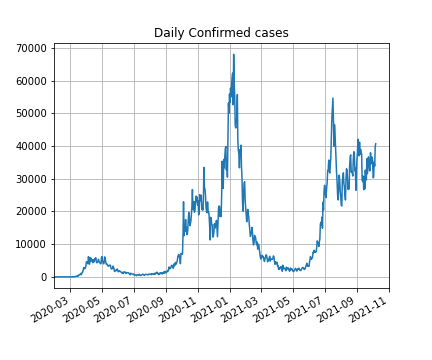

In [106]:
# plotting daily confirmed cases 
width = 6
height = 5
plt.figure(figsize = (width, height))
plt.plot(df_cases['date'],df_cases['newCasesByPublishDate'], linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.grid()

plt.title("Daily Confirmed cases")




# set plotting boundry on the time axis
date_start =dt.date(2020, 1, 30)
date_end = dt.date(2021, 11, 1)



plt.gca().set_xbound(date_start, date_end)
plt.show()

## Notes
* Number of people with a positive COVID-19 virus test (either lab-reported or rapid lateral flow test) on reporting date. 



# Vaccinations
* Data is from 10/01/2021 - 06/10/2021

In [107]:
df1 = pd.read_csv('data_2021-Oct-07_vaccination_first_dose.csv', delimiter = ',')
df1.shape

(270, 6)

In [108]:
df1.columns

Index(['areaType', 'areaName', 'areaCode', 'date',
       'newPeopleVaccinatedFirstDoseByPublishDate',
       'cumPeopleVaccinatedFirstDoseByPublishDate'],
      dtype='object')

In [109]:
df2 = pd.read_csv('data_2021-Oct-07_vaccination_second_dose.csv',delimiter = ',')
df2.head(5)

,areaType,areaName,areaCode,date,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,06/10/2021,28576.0,45078529
1,overview,United Kingdom,K02000001,05/10/2021,28572.0,45049953
2,overview,United Kingdom,K02000001,04/10/2021,29337.0,45021381
3,overview,United Kingdom,K02000001,03/10/2021,21532.0,44992044
4,overview,United Kingdom,K02000001,02/10/2021,34391.0,44970512


In [110]:
df2.shape

(270, 6)

In [111]:
df2.columns

Index(['areaType', 'areaName', 'areaCode', 'date',
       'newPeopleVaccinatedSecondDoseByPublishDate',
       'cumPeopleVaccinatedSecondDoseByPublishDate'],
      dtype='object')

In [112]:
#  merge two CSV based on date
df1.merge(df2,on='date')

,areaType_x,areaName_x,areaCode_x,date,newPeopleVaccinatedFirstDoseByPublishDate,cumPeopleVaccinatedFirstDoseByPublishDate,areaType_y,areaName_y,areaCode_y,newPeopleVaccinatedSecondDoseByPublishDate,cumPeopleVaccinatedSecondDoseByPublishDate
0,overview,United Kingdom,K02000001,06/10/2021,32828.0,49068705,overview,United Kingdom,K02000001,28576.0,45078529
1,overview,United Kingdom,K02000001,05/10/2021,41347.0,49035877,overview,United Kingdom,K02000001,28572.0,45049953
2,overview,United Kingdom,K02000001,04/10/2021,37671.0,48994530,overview,United Kingdom,K02000001,29337.0,45021381
3,overview,United Kingdom,K02000001,03/10/2021,24123.0,48956859,overview,United Kingdom,K02000001,21532.0,44992044
4,overview,United Kingdom,K02000001,02/10/2021,31066.0,48932736,overview,United Kingdom,K02000001,34391.0,44970512
...,...,...,...,...,...,...,...,...,...,...,...
265,overview,United Kingdom,K02000001,14/01/2021,316694.0,3234946,overview,United Kingdom,K02000001,5257.0,443234
266,overview,United Kingdom,K02000001,13/01/2021,278943.0,2918252,overview,United Kingdom,K02000001,9745.0,437977
267,overview,United Kingdom,K02000001,12/01/2021,207661.0,2639309,overview,United Kingdom,K02000001,16065.0,428232
268,overview,United Kingdom,K02000001,11/01/2021,145076.0,2431648,overview,United Kingdom,K02000001,20768.0,412167


In [113]:
#  sorting out date 
df1['date'] = pd.to_datetime(df1['date'], dayfirst = True)
df1.sort_values(by = 'date', ascending = True, inplace = True)

df2['date'] = pd.to_datetime(df2['date'], dayfirst = True)
df2.sort_values(by = 'date', ascending = True, inplace = True)

<IPython.core.display.Javascript object>


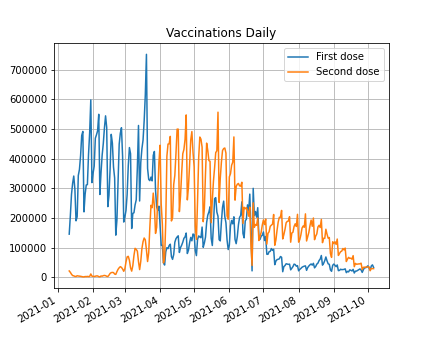

In [114]:
# plotting vaccination data
plt.figure(figsize = (width, height))
plt.plot(df1['date'],df1['newPeopleVaccinatedFirstDoseByPublishDate'], linestyle = 'solid', label = "First dose")
plt.plot(df2['date'],df2['newPeopleVaccinatedSecondDoseByPublishDate'], linestyle = 'solid', label = "Second dose")
plt.gcf().autofmt_xdate()
plt.grid()
plt.title("Vaccinations Daily")
plt.legend()
plt.show()

## Notes
* Number of people who have received a COVID-19 vaccination, by day on which the vaccine was reported.
* The vaccination programme began on 8 December 2020 with people receiving the vaccine developed by Pfizer/BioNTech; Oxford University/AstraZeneca vaccine from 4 January 2021, and the Moderna vaccine from 7 April 2021. 

# Death

In [2]:
df_death = pd.read_csv('data_2021-Oct-07_death.csv', delimiter = ',')
df_death.shape

(581, 6)

In [6]:
df_death.columns

Index(['areaType', 'areaName', 'areaCode', 'date',
       'newDeaths28DaysByPublishDate', 'cumDeaths28DaysByPublishDate'],
      dtype='object')

In [3]:
df_death.head(5)

,areaType,areaName,areaCode,date,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate
0,overview,United Kingdom,K02000001,2021-10-07,122,137417
1,overview,United Kingdom,K02000001,2021-10-06,143,137295
2,overview,United Kingdom,K02000001,2021-10-05,166,137152
3,overview,United Kingdom,K02000001,2021-10-04,33,136986
4,overview,United Kingdom,K02000001,2021-10-03,43,136953


In [4]:
df_death.tail(5)

,areaType,areaName,areaCode,date,newDeaths28DaysByPublishDate,cumDeaths28DaysByPublishDate
576,overview,United Kingdom,K02000001,2020-03-10,4,7
577,overview,United Kingdom,K02000001,2020-03-09,1,3
578,overview,United Kingdom,K02000001,2020-03-08,0,2
579,overview,United Kingdom,K02000001,2020-03-07,1,2
580,overview,United Kingdom,K02000001,2020-03-06,1,1


In [5]:
df_death['date']= pd.to_datetime(df_death['date'],dayfirst = True)
df_death.sort_values(by = 'date',ascending = True,inplace = True)

<IPython.core.display.Javascript object>


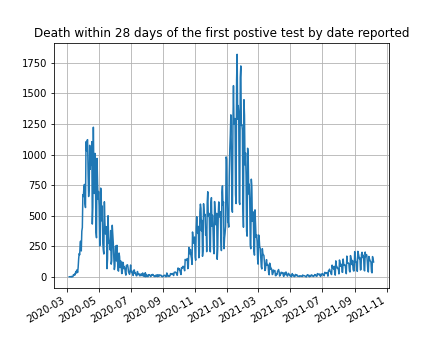

In [115]:
width = 6
height = 5
plt.figure(figsize = (width,height))
plt.plot(df_death['date'], df_death['newDeaths28DaysByPublishDate'],linestyle = 'solid')
plt.gcf().autofmt_xdate()
plt.grid()
plt.title('Death within 28 days of the first postive test by date reported')
plt.show()

## Notes
* 